# Decision Tree Classification on Breast Cancer Dataset

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

sns.set(style="whitegrid")


## Load Breast Cancer Dataset

In [2]:

cancer = datasets.load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

print("Dataset shape:", X.shape)
print("Classes:", cancer.target_names)
print("Class distribution:", y.value_counts())


Dataset shape: (569, 30)
Classes: ['malignant' 'benign']
Class distribution: 1    357
0    212
Name: count, dtype: int64


## Exploratory Data Analysis

/tmp/ipykernel_14081/228480837.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


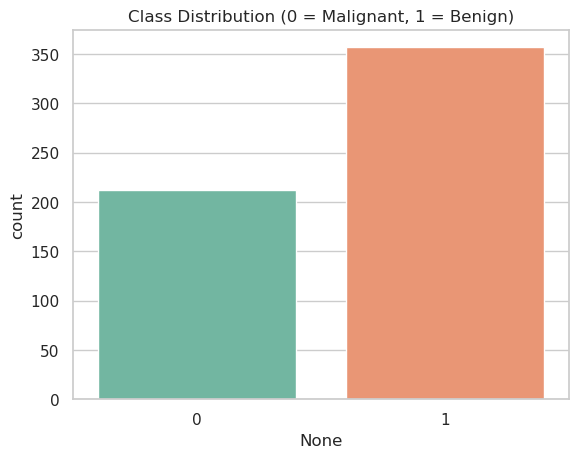

In [11]:

sns.countplot(x=y, palette="Set2")
plt.title("Class Distribution (0 = Malignant, 1 = Benign)")
plt.show()


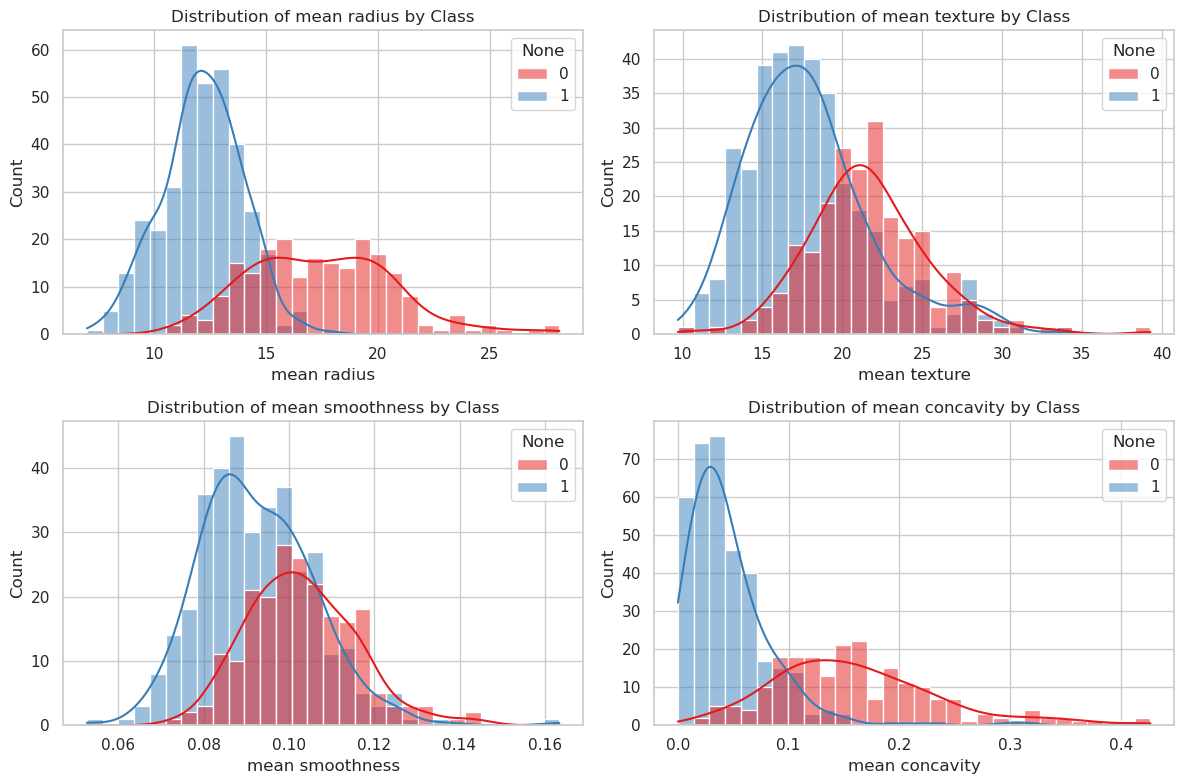

In [12]:
# Visualize distribution of a few important features
features_to_plot = ["mean radius", "mean texture", "mean smoothness", "mean concavity"]

plt.figure(figsize=(12,8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2,2,i)
    sns.histplot(x=X[feature], hue=y, bins=30, kde=True, palette="Set1")
    plt.title(f"Distribution of {feature} by Class")
plt.tight_layout()
plt.show()


## Train-Test Split

In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


## Train Decision Tree Classifier

In [5]:

dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

dt_depth4 = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_depth4.fit(X_train, y_train)

print("Default Tree Accuracy:", dt_default.score(X_test, y_test))
print("Depth=4 Tree Accuracy:", dt_depth4.score(X_test, y_test))


Default Tree Accuracy: 0.9181286549707602
Depth=4 Tree Accuracy: 0.9239766081871345


## Model Evaluation

In [13]:

y_pred = dt_depth4.predict(X_test)

print("Classification Report (Depth=4 Tree):\n", classification_report(y_test, y_pred, target_names=cancer.target_names))


Classification Report (Depth=4 Tree):
               precision    recall  f1-score   support

   malignant       0.90      0.89      0.90        64
      benign       0.94      0.94      0.94       107

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



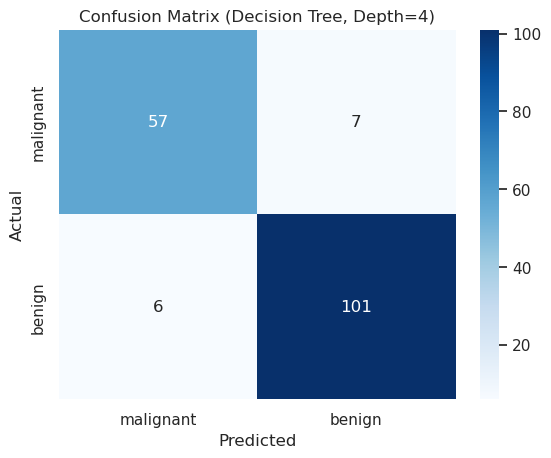

In [14]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.title("Confusion Matrix (Decision Tree, Depth=4)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

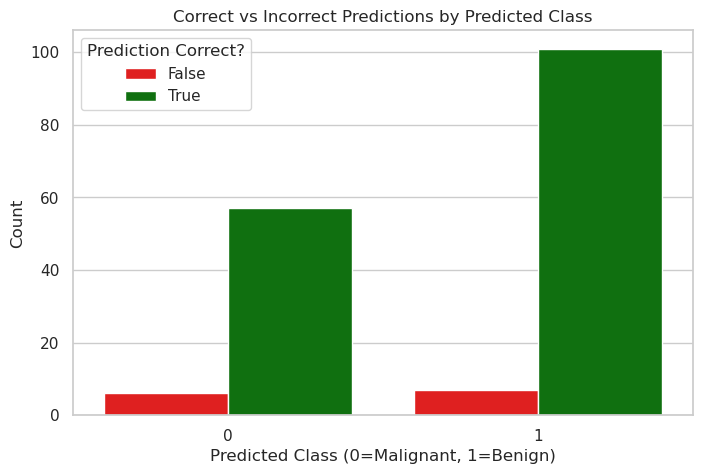

In [15]:
# Visualize correct vs incorrect predictions
comparison = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
comparison["Correct"] = comparison["Actual"] == comparison["Predicted"]

plt.figure(figsize=(8,5))
sns.countplot(x="Predicted", hue="Correct", data=comparison, palette={True:"green", False:"red"})
plt.title("Correct vs Incorrect Predictions by Predicted Class")
plt.xlabel("Predicted Class (0=Malignant, 1=Benign)")
plt.ylabel("Count")
plt.legend(title="Prediction Correct?")
plt.show()


## ROC Curve & AUC

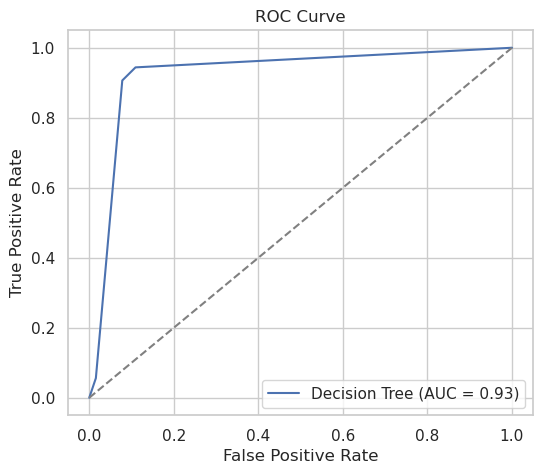

In [7]:

y_prob = dt_depth4.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## Actual vs Predicted (Subset Line Plot)

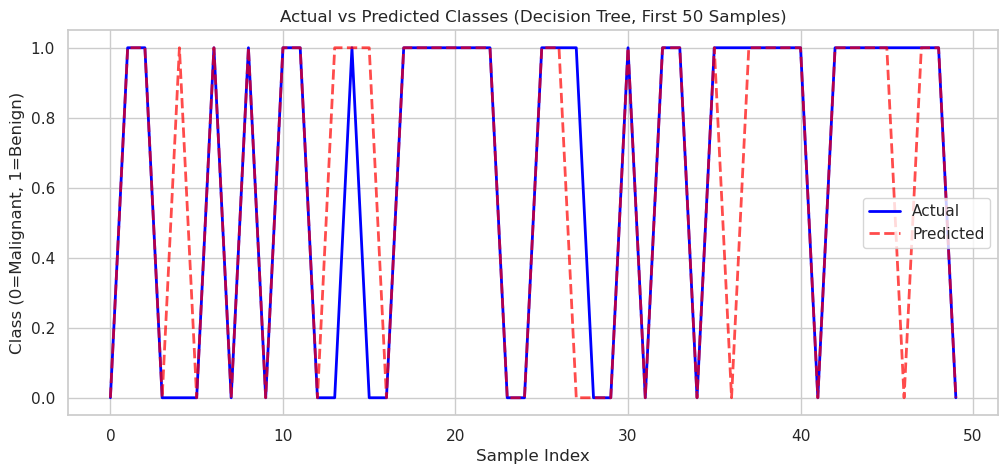

In [8]:

comparison = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred}).reset_index(drop=True)
subset = comparison.iloc[:50]

plt.figure(figsize=(12,5))
plt.plot(subset.index, subset["Actual"], label="Actual", color="blue", linewidth=2)
plt.plot(subset.index, subset["Predicted"], label="Predicted", color="red", linestyle="--", linewidth=2, alpha=0.7)
plt.title("Actual vs Predicted Classes (Decision Tree, First 50 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Class (0=Malignant, 1=Benign)")
plt.legend()
plt.show()


## Feature Importance

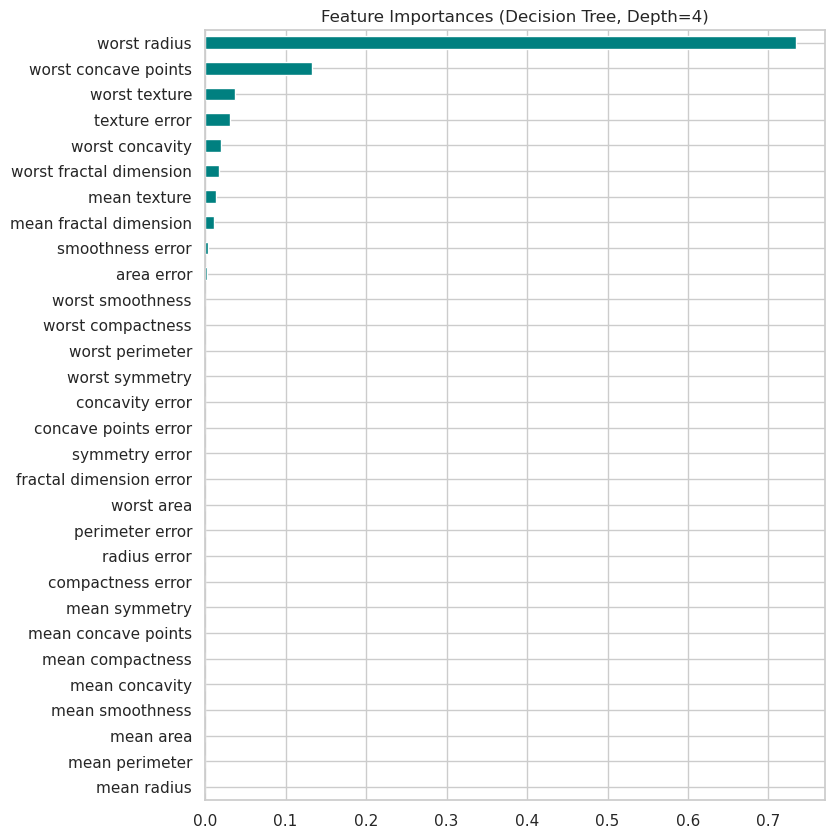

In [9]:

importances = pd.Series(dt_depth4.feature_importances_, index=cancer.feature_names)
importances = importances.sort_values(ascending=True)

plt.figure(figsize=(8,10))
importances.plot(kind="barh", color="teal")
plt.title("Feature Importances (Decision Tree, Depth=4)")
plt.show()


/tmp/ipykernel_14081/753009975.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


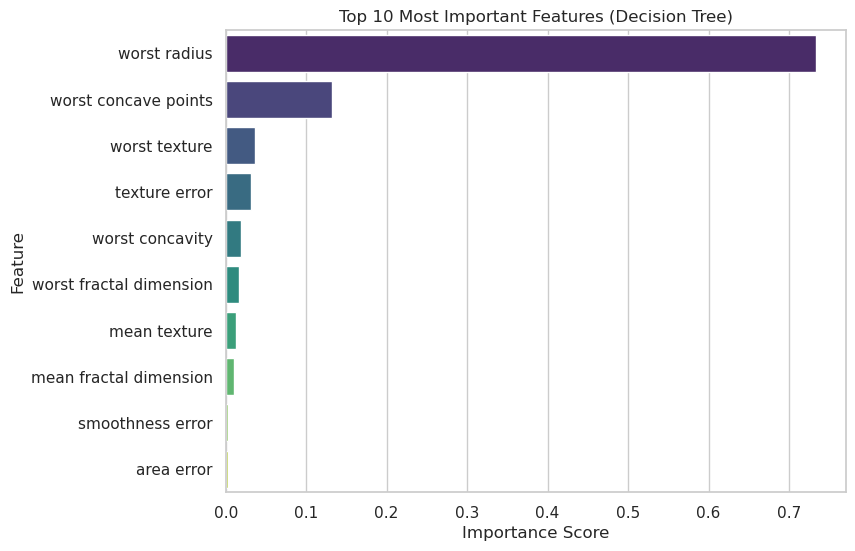

In [16]:
# Show only top 10 important features
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.title("Top 10 Most Important Features (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


## Decision Tree Visualization

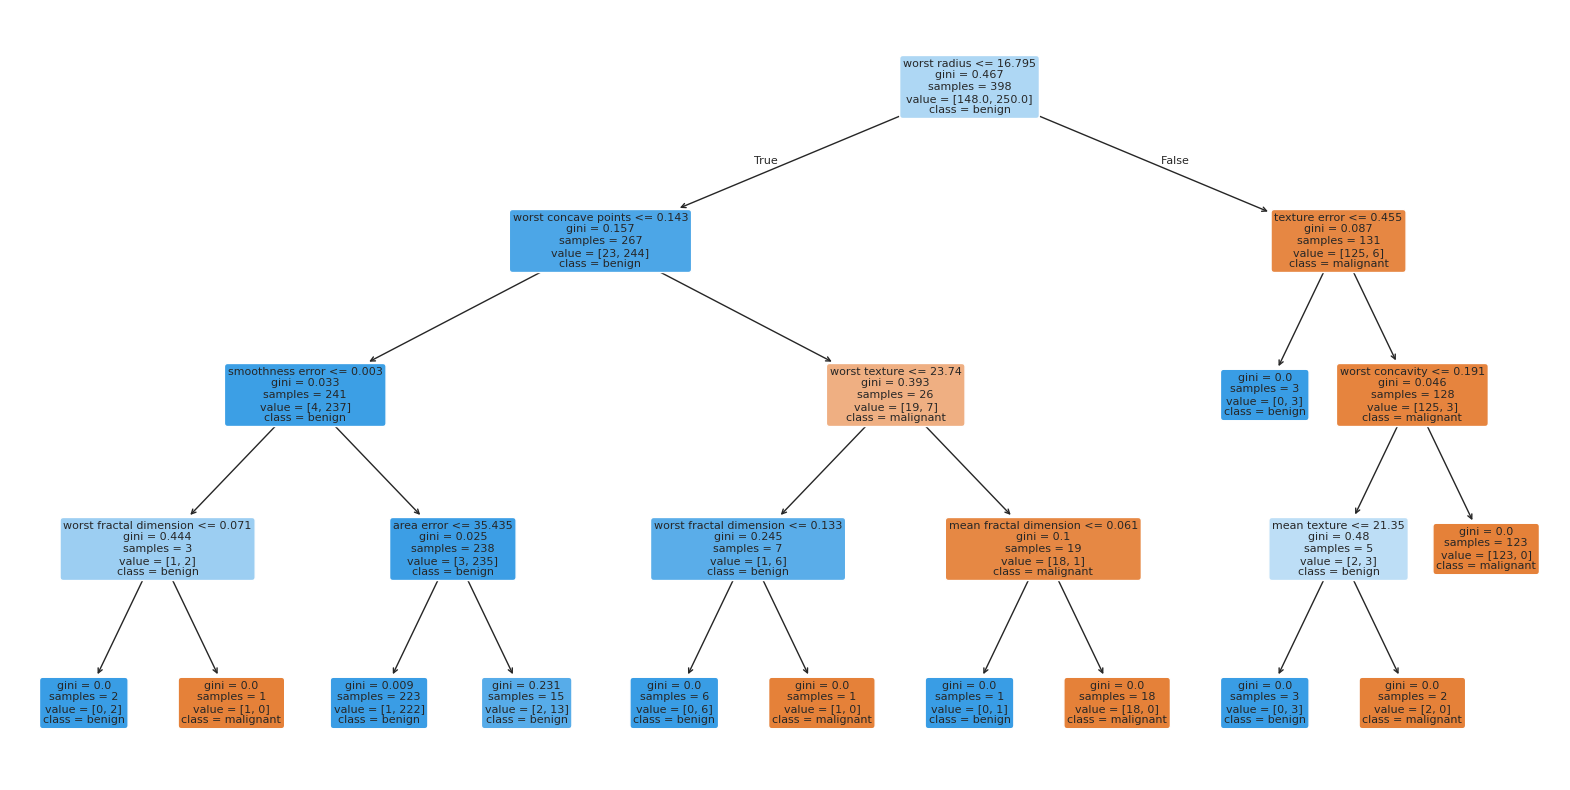

In [10]:

plt.figure(figsize=(20,10))
plot_tree(dt_depth4, feature_names=cancer.feature_names, class_names=cancer.target_names, filled=True, rounded=True, fontsize=8)
plt.show()
